### Loading packages

In [3]:
#### Loading packages ####
# We use tidyverse in this note
library(tidyverse)


── Attaching core tidyverse packages ───────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### Data importation

In [25]:
# Manually enter: 
Y<-c(6.98, 5.15, 2.78, 4.94, 7.18, 5.70, 4.70, 5.69, 11.23, 7.90,
     6.00, 6.97, 6.32, 7.02, 6.84, 8.53)
X<-c(0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1)
hw3dat<-tibble(X=X,Y=Y)
summary(hw3dat)
# Let R know that X is a factor 
typeof(hw3dat$X)
hw3dat$X<-as.factor(hw3dat$X)


       X             Y         
 Min.   :0.0   Min.   : 2.780  
 1st Qu.:0.0   1st Qu.: 5.555  
 Median :0.5   Median : 6.580  
 Mean   :0.5   Mean   : 6.496  
 3rd Qu.:1.0   3rd Qu.: 7.060  
 Max.   :1.0   Max.   :11.230  

[1] "double"

In [ ]:
# Read a CSV file (comma-separated value)
wage=read_csv("./wage.csv")
summary(wage)
typeof(wage$ethnicity)
# Let R know that both ethnicity and occupation should be treated as factor
wage$ethnicity<-as.factor(wage$ethnicity)
wage$occupation<-as.factor(wage$occupation)

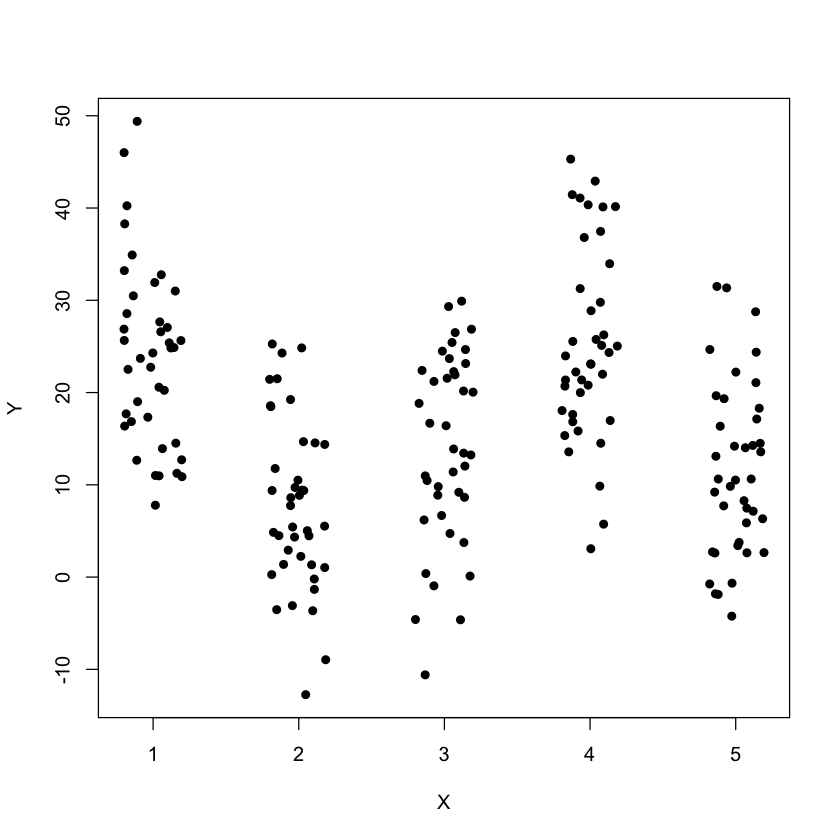

In [21]:
# Generate synthetic data
# set.seed(1)
sigma=10
n=200; # 200 balls 
a=5; # 5 factor levels (colors)
mus=2*((c(4,1,3,5,2)+1));
X<-rep(1:a,times=40)
Y=(2*mus[X])+rnorm(n,sd=sigma); # response Y
dat.sim<-tibble(Y=Y,X=X)
plot(dat.sim$Y~jitter(dat.sim$X),xlab="X",ylab="Y",pch=16)

### Model fitting 

In [26]:
#### Model fitting ####

mod<-aov(Y~X,data=hw3dat) 
# Translate this line to English:
# fit an ANOVA model with Y being the response and X being the factor, where X and Y are columns from the dataset hw3dat,
# and save the fitted model as object "mod"

summary(mod)

            Df Sum Sq Mean Sq F value Pr(>F)  
X            1  19.56  19.559   8.271 0.0122 *
Residuals   14  33.11   2.365                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
# Two-way ANOVA: 
mod2way<-aov(wage~ethnicity+occupation,data=wage)
summary(mod2way)

### Statistical inference

In [ ]:
# Full model v.s. reduced model:
# Suppose we want to test if occupation is associated with wage

# full model is mod2way

# reduced model is the model without occupation
modred=aov(wage~ethnicity,data=wage)

# The F-test is 
anova(mod2way,modred)
# anova() v.s. aov()! 


In [ ]:
# Confidence interval via confint()
confint(mod,level=0.99)
confint(mod2way,level=0.95)


### Simultaneius confidence intervals

We will revisit this section on Wednesday.

In [ ]:
#### Simultaneous inference ####
# Tukey-Kramer CIs
sig.level=0.05
T.ci=TukeyHSD(modred,conf.level = 1-sig.level)
plot(T.ci, las=1 , col="brown")

T.ci
# Bonferroni CIs:
confint(modred,level= 1- sig.level/3)

### Model diagnostics 

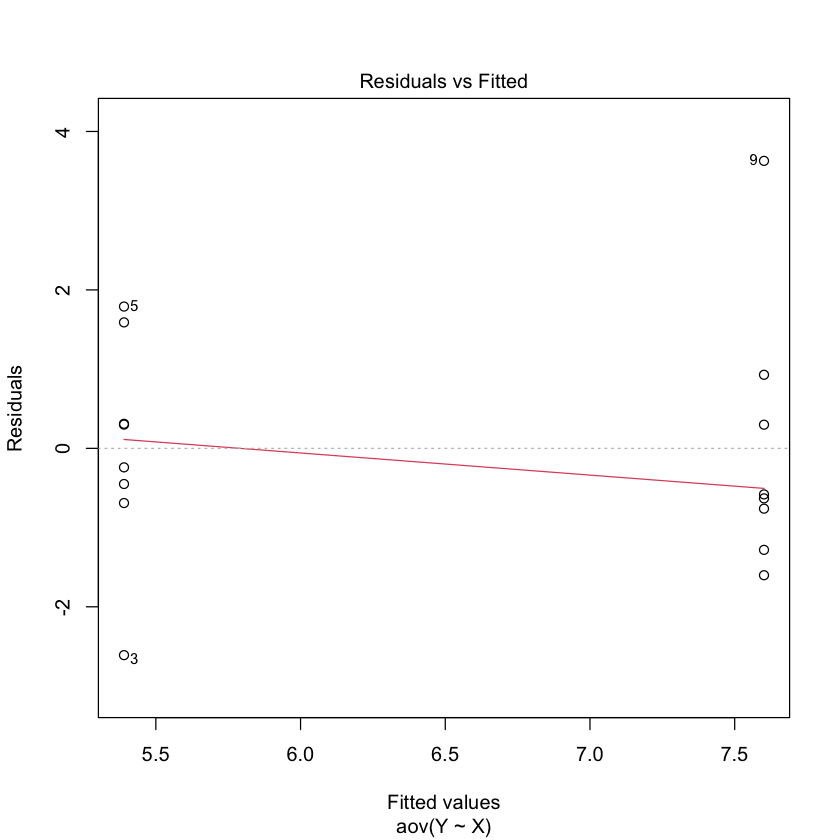

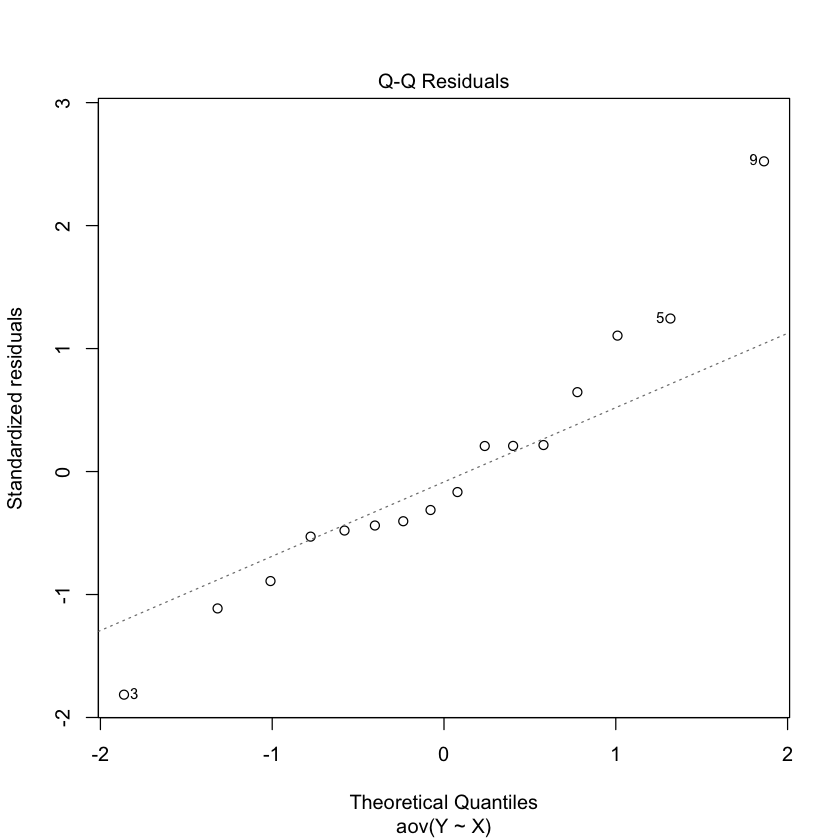

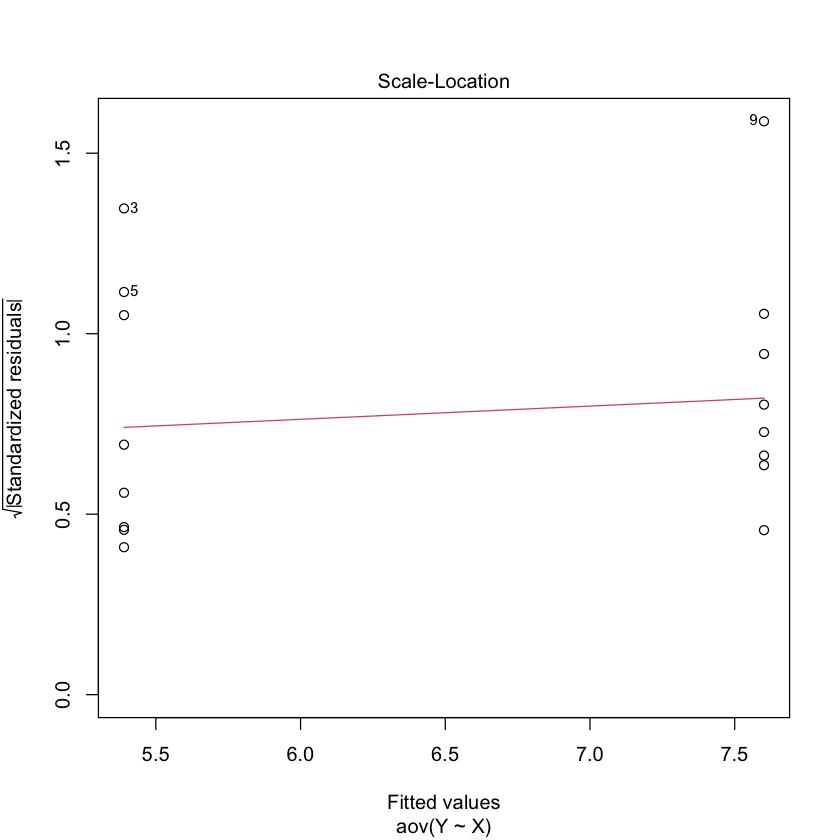

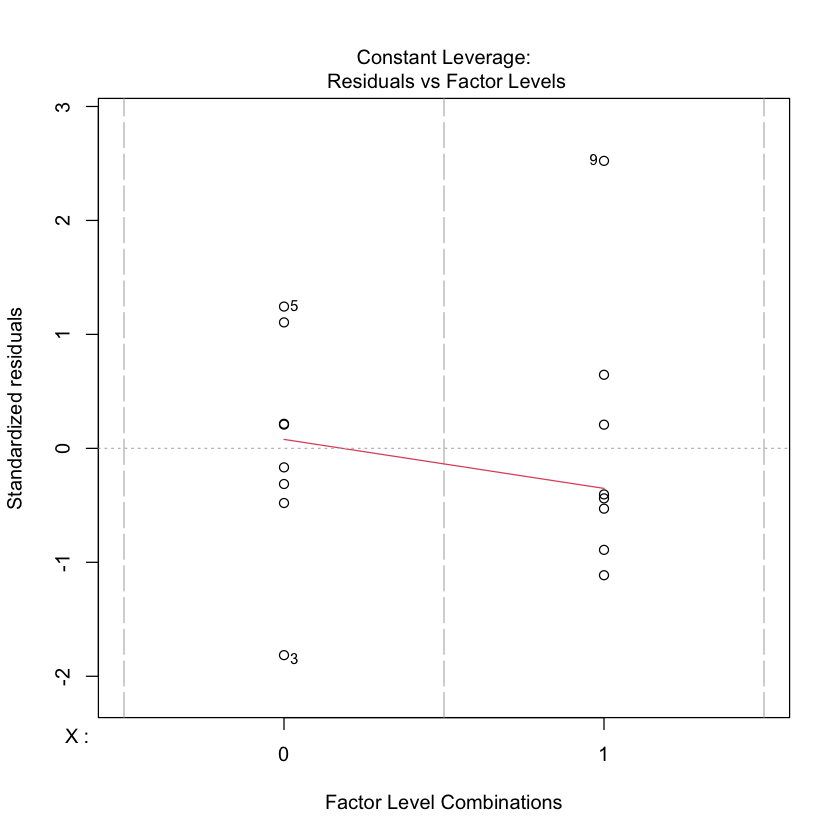

In [27]:
plot(mod)

In [ ]:
plot(mod2way)

### Simulation 

We can conduct a simulation to investigate the meaning of coverage probabilities of confidence intervals

In [ ]:
# One instance:
 sigma=10
  n=200; # 200 samples in total
  a=5; # 5 factor levels (colors)
  mus=2*((c(4,1,3,5,2)+1));
  X<-rep(1:a,times=40)
  Y=(2*mus[X])+rnorm(n,sd=sigma); # response Y
  dat.sim<-tibble(Y=Y,X=as.factor(X))

fit.anova=aov(Y~X,data=dat.sim);
CIs<-confint(fit.anova,level=1-alpha)  

In [30]:

# Wrapping up the function
simulate.instance<-function( alpha){
  sigma=10
  n=200; # 200 samples in total
  a=5; # 5 factor levels (colors)
  mus=2*((c(4,1,3,5,2)+1));
  X<-rep(1:a,times=40)
  Y=(2*mus[X])+rnorm(n,sd=sigma); # response Y
  dat.sim<-tibble(Y=Y,X=as.factor(X))
  fit.anova=aov(Y~X,data=dat.sim);
  CIs<-confint(fit.anova,level=1-alpha)
  return(CIs)
}

In [31]:
# Run simulation
set.seed(1)

N.sim=100
sim.CIs=replicate(N.sim,simulate.instance(alpha=0.05));

In [32]:
# True difference between mu2 and mu1 is
diff.true=4-16

# Coverage probability: 
coverage=sum(sim.CIs[2,1,]<diff.true & sim.CIs[2,2,]>diff.true)/N.sim;
coverage

[1] 0.96

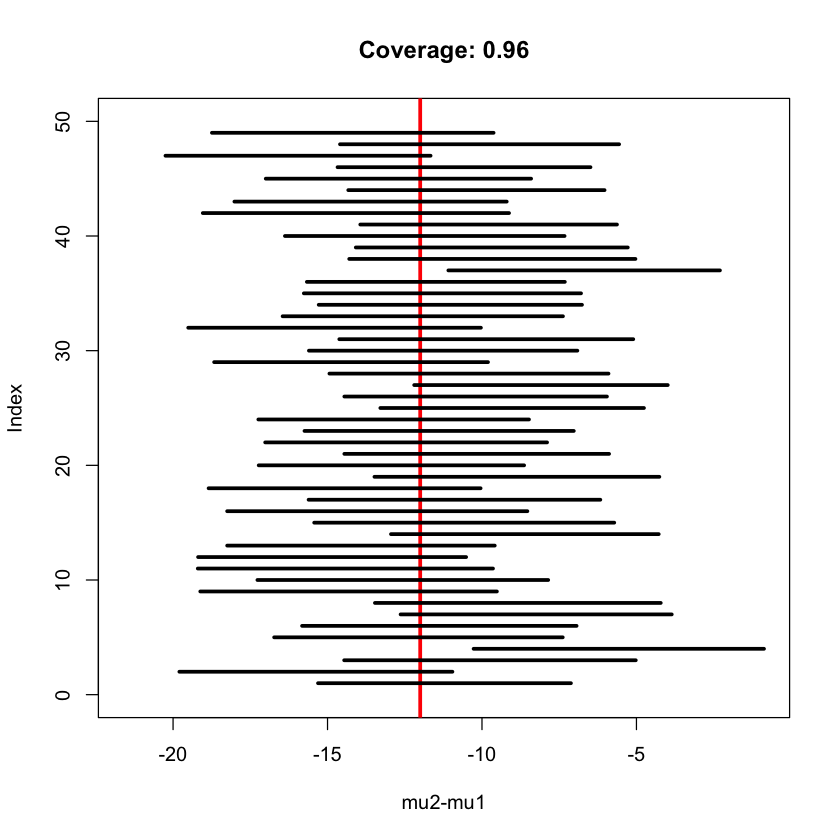

In [33]:

# Visualize result


plot(0,0,col="white",xlim=c(min(sim.CIs[2,1,]),max(sim.CIs[2,2,])),
     ylim=c(0,50),xlab="mu2-mu1",ylab="Index",main=paste('Coverage:', signif(coverage,3)))
abline(v=diff.true,lwd=3,col='red')
for(i in 1:49){
  segments(sim.CIs[2,1,i],i,sim.CIs[2,2,i],i,lwd=3)
}



